Task 3: Cross-Country Comparison

Objective: Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.



In [22]:
#Step 1: Import Libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [ ]:
class Config:
    CLEAN_DATA_PATH_BENIN = "../clean_data/benin_clean.csv"
    CLEAN_DATA_PATH_TOGO = "../clean_data/togo_clean.csv"
    CLEAN_DATA_PATH_SIERRALONE = "../clean_data/sierraleone_clean.csv"
    KEY_COLUMNS = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    THRESHOLD = 0.05


Metric comparison
- Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.
- Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).


In [24]:
class CleanedCountryDataLoader:
    """
    Loads cleaned data files for multiple countries.
    """
    def __init__(self, file_map: dict):
        """
        file_map: Dict mapping country names to their file paths.
        Example: {'Benin': 'data/benin_clean.csv', ...}
        """
        self.file_map = file_map
        self.country_dfs = {}

    def load_data(self):
        """
        Loads and validates datasets for each country.
        """
        for country, path in self.file_map.items():
            if not os.path.exists(path):
                print(f"File not found for {country}: {path}")
                continue

            try:
                df = pd.read_csv(path)
                df['Country'] = country  # Add country label
                self.country_dfs[country] = df
            except Exception as e:
                print(f"Error loading {country} data: {e}")

        if not self.country_dfs:
            raise ValueError("No datasets could be loaded.")

        return self.country_dfs

    def get_combined_dataframe(self):
        """
        Combines all loaded data into a single DataFrame for plotting.
        """
        if not self.country_dfs:
            raise ValueError("No data available. Did you call `load_data()`?")
        
        return pd.concat(self.country_dfs.values(), ignore_index=True)


class MetricBoxplotVisualizer:
    """
    Handles visualization of solar metrics across countries.
    """
    def __init__(self, df: pd.DataFrame, metrics=('GHI', 'DNI', 'DHI')):
        self.df = df
        self.metrics = metrics

    def plot_boxplots(self):
        """
        Creates boxplots for each metric by country.
        """
        for metric in self.metrics:
            if metric not in self.df.columns:
                print(f"Metric '{metric}' not found in data. Skipping.")
                continue

            plt.figure(figsize=(7, 5))
            sns.boxplot(data=self.df, x='Country', y=metric, palette='Set2')
            plt.title(f"Boxplot of {metric} by Country")
            plt.ylabel(f"{metric} (W/m²)")
            plt.xlabel("Country")
            plt.grid(True)
            plt.tight_layout()
            plt.show()


/tmp/ipykernel_7582/3720157527.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x='Country', y=metric, palette='Set2')


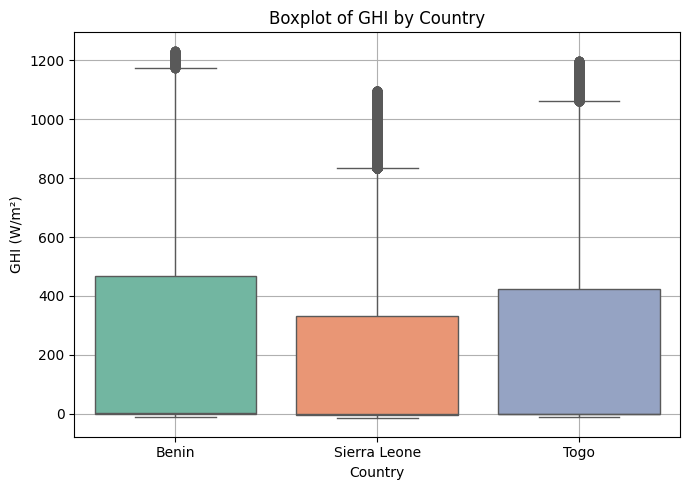

/tmp/ipykernel_7582/3720157527.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x='Country', y=metric, palette='Set2')


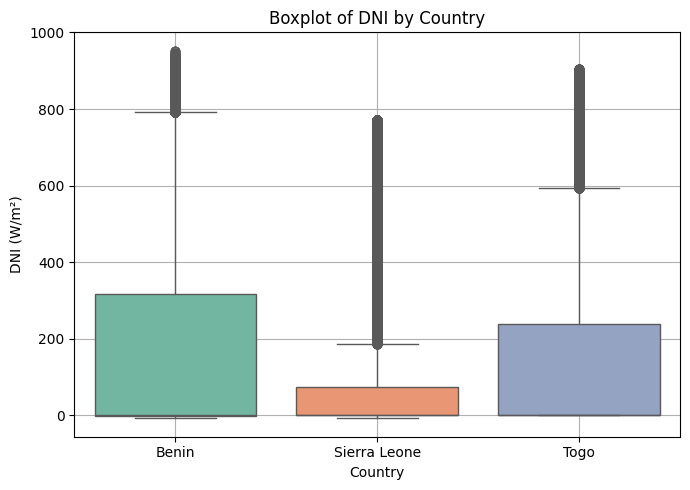

/tmp/ipykernel_7582/3720157527.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x='Country', y=metric, palette='Set2')


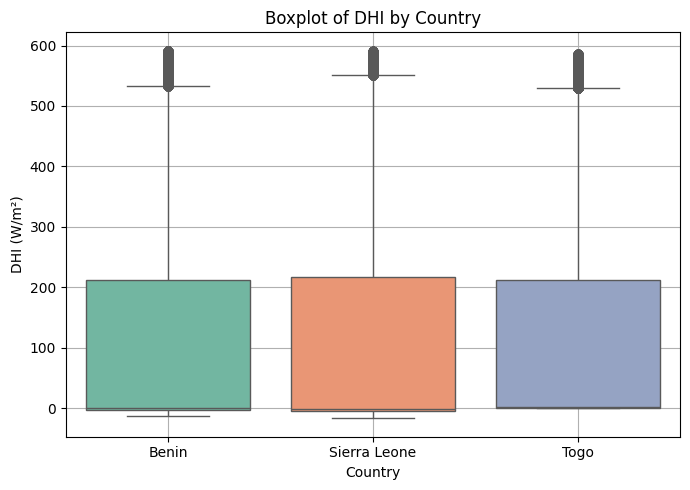

In [25]:
# Step 1: Map file paths
file_paths = {
    'Benin': Config.CLEAN_DATA_PATH_BENIN,
    'Sierra Leone': Config.CLEAN_DATA_PATH_SIERRALONE,
    'Togo': Config.CLEAN_DATA_PATH_TOGO
}

# Step 2: Load and merge datasets
loader = CleanedCountryDataLoader(file_paths)
loader.load_data()
combined_df = loader.get_combined_dataframe()

# Step 3: Plot boxplots for solar metrics
visualizer = MetricBoxplotVisualizer(combined_df)
visualizer.plot_boxplots()


Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [26]:
class MetricSummaryTableGenerator:
    """
    Generates summary statistics (mean, median, std) for solar metrics by country.
    """
    def __init__(self, df: pd.DataFrame, metrics=('GHI', 'DNI', 'DHI')):
        self.df = df
        self.metrics = metrics

    def compute_summary(self):
        """
        Returns a summary table of mean, median, and std for each metric per country.
        """
        if 'Country' not in self.df.columns:
            raise ValueError("'Country' column is missing from DataFrame.")

        summary_frames = []

        for metric in self.metrics:
            if metric not in self.df.columns:
                print(f"Metric '{metric}' not found. Skipping.")
                continue

            stats = self.df.groupby('Country')[metric].agg(
                Mean='mean',
                Median='median',
                Std='std'
            ).round(2)

            stats['Metric'] = metric
            summary_frames.append(stats.reset_index())

        if not summary_frames:
            raise ValueError("No metrics processed. Check column names.")

        summary_df = pd.concat(summary_frames, ignore_index=True)
        summary_df = summary_df[['Metric', 'Country', 'Mean', 'Median', 'Std']]
        return summary_df

    def display_summary(self):
        """
        Prints the summary table.
        """
        try:
            summary = self.compute_summary()
            print("Summary Statistics (Mean, Median, Std):")
            display(summary)
        except Exception as e:
            print(f"Failed to compute summary: {e}")


In [27]:
# Step 4: Generate and display summary table
summary_generator = MetricSummaryTableGenerator(combined_df)
summary_generator.display_summary()



Summary Statistics (Mean, Median, Std):


,Metric,Country,Mean,Median,Std
0,GHI,Benin,236.23,0.7,328.29
1,GHI,Sierra Leone,185.00,-0.4,279.02
2,GHI,Togo,223.86,0.5,317.31
3,DNI,Benin,166.90,-0.1,262.08
4,DNI,Sierra Leone,104.13,-0.1,200.95
5,DNI,Togo,147.98,0.0,247.68
6,DHI,Benin,111.66,0.5,153.10
7,DHI,Sierra Leone,108.10,-0.6,153.69
8,DHI,Togo,112.78,1.5,151.57


Statistical Testing
- Run a one-way ANOVA (or Kruskal–Wallis) on GHI values to assess whether differences between countries are significant.
- Briefly note p-values.

In [28]:
#Statistical Testing class
from scipy.stats import f_oneway, kruskal

class SolarStatisticalTester:
    """
    Performs statistical testing (ANOVA and Kruskal–Wallis) across countries on selected metrics.
    """
    def __init__(self, df: pd.DataFrame, group_col='Country'):
        self.df = df
        self.group_col = group_col

    def _prepare_groups(self, metric: str):
        """
        Splits the metric values by country.
        """
        if self.group_col not in self.df.columns:
            raise ValueError(f"Missing grouping column '{self.group_col}' in DataFrame.")
        if metric not in self.df.columns:
            raise ValueError(f"Metric '{metric}' not found in DataFrame.")

        grouped = self.df.groupby(self.group_col)[metric].apply(list)
        if len(grouped) < 2:
            raise ValueError("Need at least two groups for statistical testing.")
        return grouped

    def run_anova(self, metric: str):
        """
        Runs one-way ANOVA on the metric across countries.
        """
        try:
            groups = self._prepare_groups(metric)
            stat, p_value = f_oneway(*groups)
            print(f"ANOVA on '{metric}': F-statistic = {stat:.4f}, p-value = {p_value:.4f}")
            return {'method': 'ANOVA', 'stat': stat, 'p_value': p_value}
        except Exception as e:
            print(f"ANOVA failed: {e}")
            return None

    def run_kruskal(self, metric: str):
        """
        Runs Kruskal-Wallis H-test on the metric across countries (non-parametric).
        """
        try:
            groups = self._prepare_groups(metric)
            stat, p_value = kruskal(*groups)
            print(f"Kruskal-Wallis on '{metric}': H-statistic = {stat:.4f}, p-value = {p_value:.4f}")
            return {'method': 'Kruskal-Wallis', 'stat': stat, 'p_value': p_value}
        except Exception as e:
            print(f"Kruskal-Wallis failed: {e}")
            return None


In [29]:
# Step 5: Statistical Testing on GHI
tester = SolarStatisticalTester(combined_df)
anova_result = tester.run_anova('GHI')
kruskal_result = tester.run_kruskal('GHI')


ANOVA on 'GHI': F-statistic = 3833.1842, p-value = 0.0000
Kruskal-Wallis on 'GHI': H-statistic = 6548.5338, p-value = 0.0000


Interpretation:

A p-value < 0.05 suggests statistically significant differences in GHI across the three countries.

Key Observations
- A markdown cell with 3 bullet points summarizing what stands out (e.g., “Country X shows highest median GHI but also greatest variability”).


In [30]:
class SolarInsightsGenerator:
    """
    Generates markdown bullet point insights from summary statistics and test results.
    """
    def __init__(self, summary_stats: pd.DataFrame, test_results: dict):
        self.summary_stats = summary_stats
        self.test_results = test_results

    def _get_top_country(self, metric: str, stat: str):
        """
        Returns the country with the highest value for a given metric and statistic.
        """
        try:
            top_country = self.summary_stats.loc[self.summary_stats[(metric, stat)].idxmax()].name
            top_value = self.summary_stats[(metric, stat)].max()
            return top_country, top_value
        except Exception:
            return None, None

    def _get_most_variable_country(self, metric: str):
        """
        Country with the highest standard deviation in the given metric.
        """
        try:
            stds = self.summary_stats[(metric, 'std')]
            return stds.idxmax(), stds.max()
        except Exception:
            return None, None

    def generate_observations(self):
        """
        Returns 3 insightful markdown-ready bullet points.
        """
        observations = []

        # 1. Highest median GHI
        ghi_median_country, ghi_median_val = self._get_top_country('GHI', 'median')
        if ghi_median_country:
            observations.append(f"- **{ghi_median_country}** has the highest **median GHI** ({ghi_median_val:.2f} W/m²), indicating strong solar potential.")

        # 2. Most variable GHI
        ghi_var_country, ghi_std_val = self._get_most_variable_country('GHI')
        if ghi_var_country:
            observations.append(f"- **{ghi_var_country}** exhibits the **greatest variability** in GHI (std = {ghi_std_val:.2f}), suggesting fluctuations in solar availability.")

        # 3. Statistical test result
        if self.test_results.get("anova") and self.test_results["anova"]["p_value"] < 0.05:
            observations.append("- Differences in **GHI** between countries are **statistically significant** (ANOVA p = "
                                f"{self.test_results['anova']['p_value']:.4f}).")
        elif self.test_results.get("kruskal") and self.test_results["kruskal"]["p_value"] < 0.05:
            observations.append("- Differences in **GHI** between countries are **statistically significant** (Kruskal–Wallis p = "
                                f"{self.test_results['kruskal']['p_value']:.4f}).")
        else:
            observations.append("- No statistically significant difference in GHI between countries.")

        return observations


In [31]:
# Step 6: Generate Key Observations
# Compute summary statistics
summary_stats = summary_generator.compute_summary()

test_results = {
    "anova": anova_result,
    "kruskal": kruskal_result
}

insights = SolarInsightsGenerator(summary_stats, test_results)
observation_bullets = insights.generate_observations()

# Display as Markdown
from IPython.display import Markdown, display

display(Markdown("### 🔍 Key Observations"))
for bullet in observation_bullets:
    display(Markdown(bullet))


### 🔍 Key Observations

- Differences in **GHI** between countries are **statistically significant** (ANOVA p = 0.0000).

Visual Summary
- A small bar chart ranking countries by average GHI.


In [36]:
class SolarVisualizer:
    """
    Provides summary visualizations for solar metric comparisons across countries.
    """

    def __init__(self, summary_stats: pd.DataFrame):
        self.summary_stats = summary_stats

    def plot_average_ghi_bar_chart(self):
        try:
            # Filter for GHI metric only
            ghi_stats = self.summary_stats[self.summary_stats['Metric'] == 'GHI']

            # Sort by Mean descending
            ghi_stats_sorted = ghi_stats.sort_values(
                by='Mean', ascending=False)

            # Plot
            plt.figure(figsize=(8, 5))
            sns.barplot(x='Country', y='Mean',
                        data=ghi_stats_sorted, palette="YlOrBr")
            plt.title("Average GHI by Country")
            plt.ylabel("Average GHI")
            plt.xlabel("Country")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error generating average GHI bar chart: {e}")

  Metric       Country    Mean  Median     Std
0    GHI         Benin  236.23     0.7  328.29
1    GHI  Sierra Leone  185.00    -0.4  279.02
2    GHI          Togo  223.86     0.5  317.31
3    DNI         Benin  166.90    -0.1  262.08
4    DNI  Sierra Leone  104.13    -0.1  200.95
5    DNI          Togo  147.98     0.0  247.68
6    DHI         Benin  111.66     0.5  153.10
7    DHI  Sierra Leone  108.10    -0.6  153.69
8    DHI          Togo  112.78     1.5  151.57


/tmp/ipykernel_7582/1634828905.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Mean',


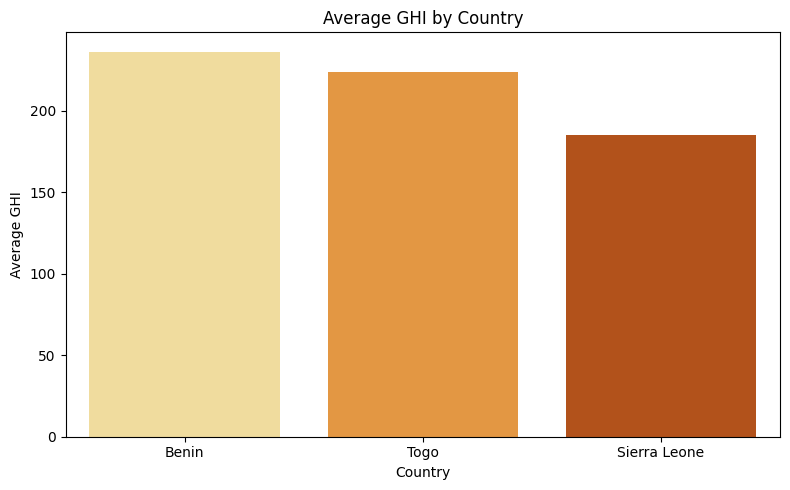

In [37]:
# Use the existing summary_generator to compute summary statistics
summary_stats = summary_generator.compute_summary()
print(summary_stats)
# Initialize visualizer with summary stats
visualizer = SolarVisualizer(summary_stats)

# Plot average GHI bar chart
visualizer.plot_average_ghi_bar_chart()